# Lab_9.6.1_Support_Vector_Classifiers

In [65]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#set seed 
np.random.seed(1)
X = np.random.normal(size = (20,2))
y = np.array([0]*10 + [1]*10)  #maked an array which has ten 0, and ten 1 

X[y==1,] = X[y==1,] + 1 #here, we are adding 1 to all the observations where y = 1 #can you guess why
# The reason is to make the classes more separable than before

NOTE:- the classes names are 0,1 instead of -1,+1 as in the book, becase when earlier i chose -1,+1 the graph from sns.scatterplot had three hue, -1,0,+1 

In [22]:
#making a dataframe
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})
df.head()

,X1,X2,y
0,1.624345,-0.611756,0
1,-0.528172,-1.072969,0
2,0.865408,-2.301539,0
3,1.744812,-0.761207,0
4,0.319039,-0.249370,0


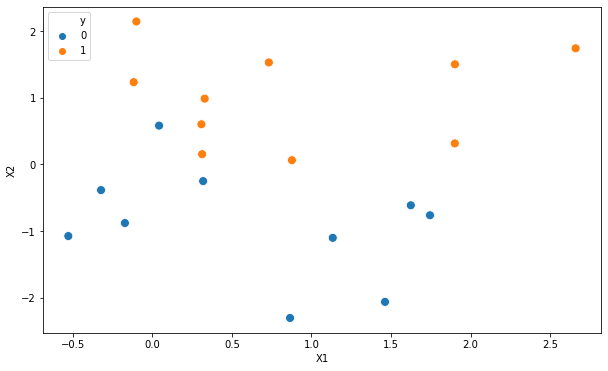

In [33]:
plt.figure(figsize = (10,6))
sns.scatterplot(df['X1'],df['X2'],hue = df['y'],s = 80) # s controls the size of the points

Just as we were expecting (from the text), the data is not linearly separable into two classes

## Fitting the svm and visualizing the results

In [35]:
svm = SVC(kernel='linear',C = 10)
svm.fit(df.drop('y',axis = 1),df['y'])

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Text(0, 0.5, 'X2')

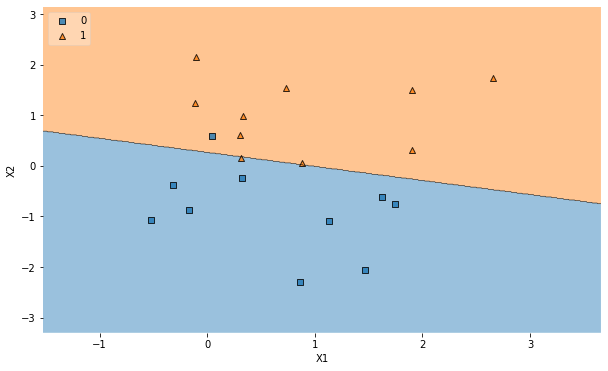

In [44]:
# for plotting decision boundary i have used mlxtend library
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(df.drop('y',axis=1)), np.array(df['y']), clf=svm, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

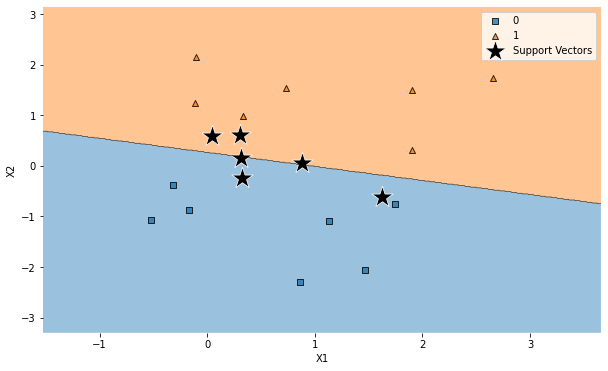

In [53]:
# adding support vectors to the graph
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(df.drop('y',axis=1)), np.array(df['y']), clf=svm, legend=2)
sns.scatterplot(svm.support_vectors_[:,0],svm.support_vectors_[:,1],marker='*',s = 500,color = 'black',label = 'Support Vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

## Using a lower value of C. 

Lets see what different we will have when we use a lower value of the paramter C

Text(0, 0.5, 'X2')

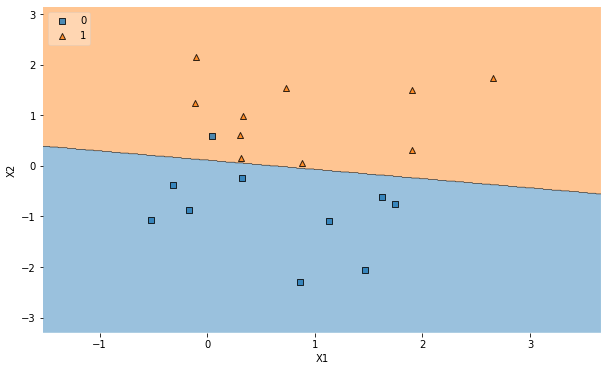

In [54]:
svm = SVC(kernel='linear',C = 1)
svm.fit(df.drop('y',axis = 1),df['y'])

# for plotting decision boundary i have used mlxtend library
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(df.drop('y',axis=1)), np.array(df['y']), clf=svm, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')

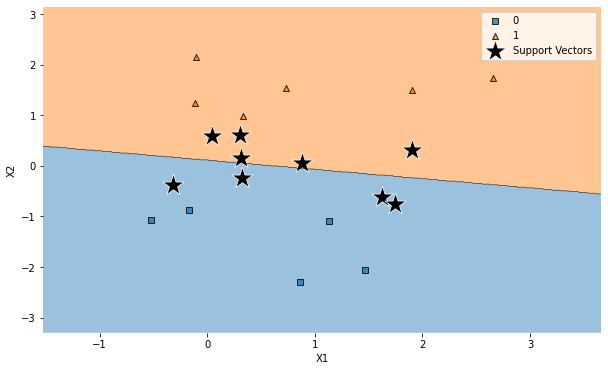

In [55]:
# adding support vectors to the graph
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(df.drop('y',axis=1)), np.array(df['y']), clf=svm, legend=2)
sns.scatterplot(svm.support_vectors_[:,0],svm.support_vectors_[:,1],marker='*',s = 500,color = 'black',label = 'Support Vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

We can see that now we have more number of support vectors as compared to the last time.

## Using cross validation to select the best value of C

For this i will be using gridsearchCV

In [60]:
svm = SVC(kernel='linear')
search = GridSearchCV(svm,{'C':[0.001, 0.01, 0.1, 1,5,10,100]},cv=10)
search.fit(df.drop('y',axis=1),df['y'])

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
search.best_params_

{'C': 0.001}

In this case, the best value of C is 0.001, in book it is 0.01, but remember the way data is choosen is different in both of the cases

In [63]:
best_model = search.best_estimator_

## Cheking the performance of the best model on test data

For that lets first of all create a test data

In [83]:
np.random.seed(1)
X_test = np.random.normal(size = (20,2))
y_test = np.array([0]*10 + [1]*10)  #maked an array which has ten 0, and ten 1 

X_test[y_test==1,] = X_test[y_test==1,] + 1 
df_test = pd.DataFrame({'X1':X_test[:,0],'X2':X_test[:,1],'y':y_test})

In [84]:
#lets see the accuracy and confusion matrix on test data by best_model
preds = best_model.predict(df_test.drop('y',axis=1))
print('Accuracy score is ',accuracy_score(y_test,preds))

print('Confusion Matrix is -')
confusion_matrix(y_test,preds)

Accuracy score is  0.95
Confusion Matrix is -


array([[ 9,  1],
       [ 0, 10]], dtype=int64)

## Using the case where the classes are linearily separable (barely)

In [175]:
#set seed 
np.random.seed(1)
X = np.random.normal(size = (20,2))
y = np.array([0]*10 + [1]*10)  #maked an array which has ten 0, and ten 1 

X[y==1,] = X[y==1,] + 1.4 
# The reason is to make the classes more separable than before

In [176]:
#making a dataframe
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})
df.head()

,X1,X2,y
0,1.624345,-0.611756,0
1,-0.528172,-1.072969,0
2,0.865408,-2.301539,0
3,1.744812,-0.761207,0
4,0.319039,-0.249370,0


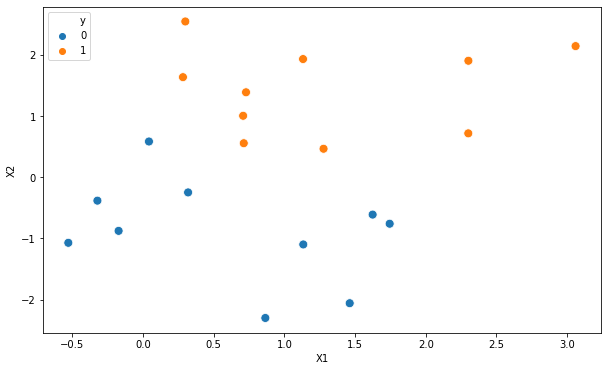

In [177]:
plt.figure(figsize = (10,6))
sns.scatterplot(df['X1'],df['X2'],hue = df['y'],s = 80) # s controls the size of the points

In [178]:
#using a very high value of C
svm = SVC(kernel='linear',C = 10000)
svm.fit(df.drop('y',axis = 1),df['y'])

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Text(0, 0.5, 'X2')

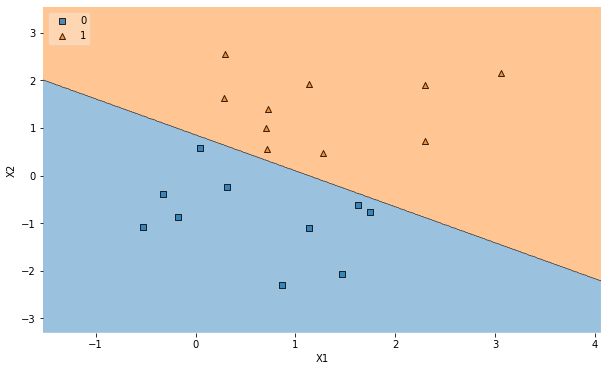

In [179]:
# for plotting decision boundary i have used mlxtend library
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(df.drop('y',axis=1)), np.array(df['y']), clf=svm, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')

### Using smaller value of cost on this data

In [180]:
#using a very high value of C
svm = SVC(kernel='linear',C = 1)
svm.fit(df.drop('y',axis = 1),df['y'])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Text(0, 0.5, 'X2')

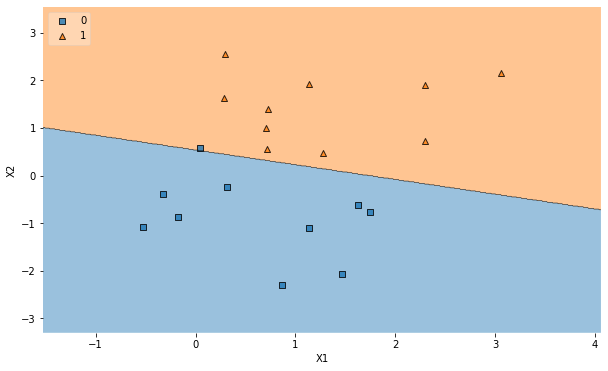

In [181]:
# for plotting decision boundary i have used mlxtend library
plt.figure(figsize = (10,6))
plot_decision_regions(np.array(df.drop('y',axis=1)), np.array(df['y']), clf=svm, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')

We can see that one observation is misclassified when using C = 1, however there were no misclassifications when C was large